# **PROJETO 1** - Ciência dos Dados


Nome: **William Augusto Reis da Silva | 2A Engenharia**

## PERGUNTA
*Considerando que alguns dos objetivos da OEA é promover o desenvolvimento econômico e reduzir as desigualdades, um país que adentrou à organização aumentou seu PIB e reduziu as desigualdades?*


### INTRODUÇÃO

O intuito deste projeto é analisar os dados de alguns países pertencentem à Organização dos Estados Americanos, instituição mais explicitada nas linhas abaixo, para conferir seus parâmetros e possíveis mudanças internas nos países com a inserção destes em tal organização. Apesar de não ser um bloco econômico, a OEA possui alguns objetivos econômicos, e que também refletem num possível impacto social, tendo em vista que países da América sempre possuíram problemas em comum.

Os dados foram obtidos através do site https://www.gapminder.org/, que possui um grande banco de dados acerca de diversas questões sobre os países. Foram obtidos:
        1. PIB bruto;
        2. Índice de Gini;
        3. Dados Gerais - "WorldBank";
        4. Balança comercial dos países.
       


### OEA - Organização dos Estados Americanos
A OEA é uma organização internacional, que foi fundada em 1948, e que possui atualmente 35 membros independentes, pertencentes ao continente americano. Iniciou com 21 países, mas com o tempo foi conseguindo mais adeptos. Os países se comprometem em defender os interesses do continente, visando a soluções pacíficas para o desenvolvimento, social, econômico e cultural. Ademais, tem objetivo de assegurar a democracia nos países e fortalecer a discussão acerca de tráfico de drogas, comércio, integração econômica, além de também prezar pelo fim da pobreza extrema e pela redução da desigualdade.
Ademais, apesar da OEA ser criada em 1948, só teve atuações significativas após 1959 [1], o que influencia totalmente para a análise crítica dos dados.
    

### Explicação da hipótese e mecanismo

A partir disso, parte-se para a análise, procurando saber se alguns dos pilares estão sendo cumpridos de fato. Para isso, passa-se pelo tópico do desenvolvimento associado à desigualdade. 

Para iniciar, pressupõe que, após se juntar à OEA, um país vai aumentar seu PIB, tendo em vista que irá manter mais relações com os países do continente americano, o que aumenta suas trocas comerciais[2], consequentemente gerando mais riquezas para o país, impactando positivamente no PIB. Por outro lado, acredita-se que isso aumentará o índice de gini, mesmo que o PIB aumente, tendo em vista que medidas neoliberais, como a abertura comercial, sem o auxílio de propostas auxiliadoras, têm a tendência de causar maior desigualdade social[3] no país, por conta de questões de concentração de riqueza. 


Com isso, é possível separar a análise em partes para refutar posteriormente à pergunta inicial:
    1. Analisar se os países de fato aumentaram as relações comerciais - comparar com países não pertencentes;
    2. Caso sim, analisar se houve crescimento do PIB - ainda comparando com não pertencentes. Caso contrário, dar uma possível explicação embasada;
    3. Analisar se há relação do Índice de Gini com o PIB em um determinado ano.
    4. Caso haja, demonstrar dados dos países analisados, para ver se confirmam esses dados, refutando a hipótese. Caso contrário, buscar compreender o porquê da hipótese ter se apresentado equívoca, propondo soluções para a melhoria da análise.

### Leitura dos arquivos

In [24]:
# Importando as bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
    
# Estilo dos gráficos 
matplotlib.style.use('ggplot')
import matplotlib

Abaixo, encontra-se a leitura dos dados proferidos.

In [25]:
paises = pd.read_excel('paises-filiacoes.xlsx')
gini = pd.read_excel('gini.xlsx')
mundo = pd.read_excel('WorldBank.xlsx')
pib_total = pd.read_excel('total_gdp_ppp_inflation_adjusted.xlsx')
balanca = pd.read_excel('trade_balance_percent_of_gdp.xlsx')

### Análise dos países pertencentes à OEA

In [26]:
oea = paises.loc[(paises.OEA==1), ['País/território']]
oea = oea.set_index("País/território").transpose()
for i in list(oea):
    print(f'{i} pertence à OEA')

Antígua e Barbuda pertence à OEA
Argentina pertence à OEA
Bahamas pertence à OEA
Barbados pertence à OEA
Belize pertence à OEA
Bolívia pertence à OEA
Brasil pertence à OEA
Canadá pertence à OEA
Chile pertence à OEA
Colômbia pertence à OEA
Costa Rica pertence à OEA
Cuba pertence à OEA
Domínica pertence à OEA
El Salvador pertence à OEA
Equador pertence à OEA
Estados Unidos pertence à OEA
Granada pertence à OEA
Guatemala pertence à OEA
Guiana pertence à OEA
Haiti pertence à OEA
Honduras pertence à OEA
Jamaica pertence à OEA
México pertence à OEA
Nicarágua pertence à OEA
Panamá pertence à OEA
Paraguai pertence à OEA
Peru pertence à OEA
República Dominicana pertence à OEA
Santa Lúcia pertence à OEA
São Cristóvão e Neves pertence à OEA
São Vicente e Granadinas pertence à OEA
Suriname pertence à OEA
Trindade e Tobago pertence à OEA
Uruguai pertence à OEA
Venezuela pertence à OEA


## Análise qualitativa dos países

Abaixo, irei fazer uma análise visando à seleção dos países para análise posterior. Pegando uma amostra dos países mais conhecidos pertencentes à OEA, irei mostrar quais são pouco desenvolvidos, mediamente desenvolvidos ou se são bastate desenvolvidos em comparação com os países em geral do continente, baseando-se em dados do Fundo Monetário Internacional[4] e da CIA[5]. Essa análise servirá como base para determinar quais países serão utilizados para se analisar os dados, já que é mister pegar nações comparáveis.

In [27]:
qualitativa = {
    "Países": [ "Argentina", "Bahamas", "Bolívia", "Belize", "Brasil", "Canadá", "Chile", 
                "Colômbia", "Costa Rica", "Cuba", "El Salvador", "Equador", "Estados Unidos",
                "Honduras", "México", "Nicarágua", "Paraguai", "Peru", "República Dominicana",
                "Suriname", "Uruguai", "Venezuela"],
    "Economia": [2,0,0,0,2,2,1,1,0,0,0,0,2,0,2,0,0,1,0,0,1,0]
}

df = pd.DataFrame(data=qualitativa).set_index("Países")

df.Economia = df.Economia.astype('category')
df.Economia.cat.categories = ['Baixa', 'Média', 'Alta']

df

,Economia
Países,
Argentina,Alta
Bahamas,Baixa
Bolívia,Baixa
Belize,Baixa
Brasil,Alta
Canadá,Alta
Chile,Média
Colômbia,Média
Costa Rica,Baixa


In [20]:
df.Economia.value_counts()

Baixa    13
Alta      5
Média     4
Name: Economia, dtype: int64

A partir disso, nota-se que a américa possui a maioria dos países com grau de desenvolvimento econômico baixo em comparação a todos do continente e poucos estão entre as maiores economias do mundo. Por conta disso, utilizarei dos países com um bom desenvolvimento econômico, já que são parecidos economicamente e, portanto, comparáveis nesses quesitos analisados.

Países selecionados:
    1. Brasil
    2. Argentina
    3. México
    4. Chile

Agora, iniciará a análise das séries temporais.

## **BALANÇA COMERCIAL**

Acima, temos os países que pertencem à OEA. No entanto, não seria interessante analisar todos os países por conta das divergentes políticas, tamanhos e particularidades. Por conta disso, foram selecionados países pelos maiores PIB's¹ pertencentes à OEA, porém que podem ser comparados, ou seja, os EUA não foram selecionados, tendo em vista que tem a particularidade de ser referência mundial[6]. Foram pegos os países com economia média e alta, de acordo com a tabela acima, com exceção dos EUA que possuem uma diferença inegável no quesito econômico, sendo insustentável a comparação.


¹ Com exceção de Cuba e Honduras, que são casos particulares que serão discutidos.

###### É importante salientar que não há dados de antes de 1960. No entanto, é uma das datas mais relevantes, sendo ainda de relevância para a análise.

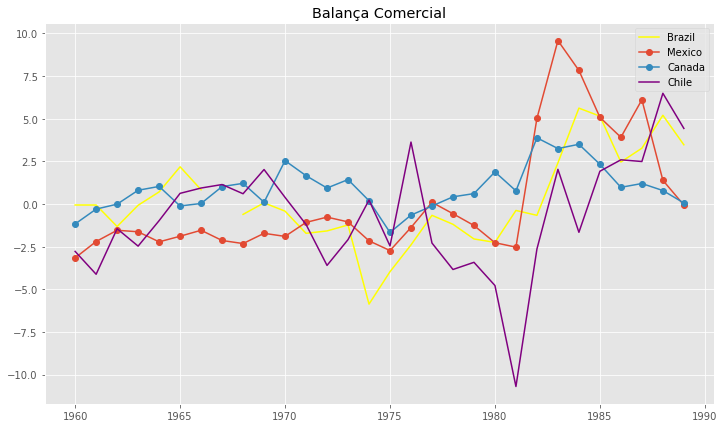

In [30]:
balanca_oea = balanca.loc[
        (balanca.country=="Argentina") |
        (balanca.country=="Brazil") |
        (balanca.country=="Canada") |
        (balanca.country=="Mexico") |
        (balanca.country=="Cuba") |
        (balanca.country=="Honduras") |
        (balanca.country=="Chile")
]

balanca_na = balanca_oea.set_index("country").transpose()

# Foram plotados apenas esses porque os outros não possuem dados completos, como a Argentina, por exemplo
plt.figure(figsize=(12,7))
plt.plot(balanca_na.loc[(balanca_na.index > 1940) & (balanca_na.index < 1990), "Brazil"], 'yellow', label="Brazil")   
plt.plot(balanca_na.loc[(balanca_na.index > 1940) & (balanca_na.index < 1990), "Mexico"],'o-', label="Mexico")
plt.plot(balanca_na.loc[(balanca_na.index > 1940) & (balanca_na.index < 1990), "Canada"],'o-', label="Canada")
plt.plot(balanca_na.loc[(balanca_na.index > 1940) & (balanca_na.index < 1990), "Chile"],'purple', label="Chile")
plt.title("Balança Comercial")
plt.legend()


A partir desse gráfico, é possível ver que, a partir de 1960, que é quando se tem dados, a tendência da maioria dos países, apesar da oscilação constante - o que é algo comum, tendo em vista que as importações e exportações mudam de acordo com cada política, sendo principalmente influência de aspectos macroeconômicos[7] - é de ter crescido a balança comercial, demonstrando que uma possível influência é a OEA, já que como foi proferido suas ações de fato começaram a ocorrer a partir de 1959. Para conferir se realmente há influências, é mister analisar o PIB.

Há exceções, que ocorreram por questões que não envolvem a OEA:
A questão do Brasil e sua alta queda em 1973 tem por explicação a Crise do Petróleo, que acabou por afetar totalmente a economia do país, que era um dos mais relevantes no quesito petrolífero e, por conta dessa tal questão, foi necessária aumentar as importações, causando esse déficit grande[8].

A do Chile, no entanto, em 1981-1982, tem relação com a ditadura de Pinotchet, que ocasionou diversos impactos na economia e gerou tais resultados[9].

## **PIB BRUTO**

#### PAÍSES PERTENCENTES

Tendo em vista o tópico anterior, infere-se o cálculo do PIB bruto.

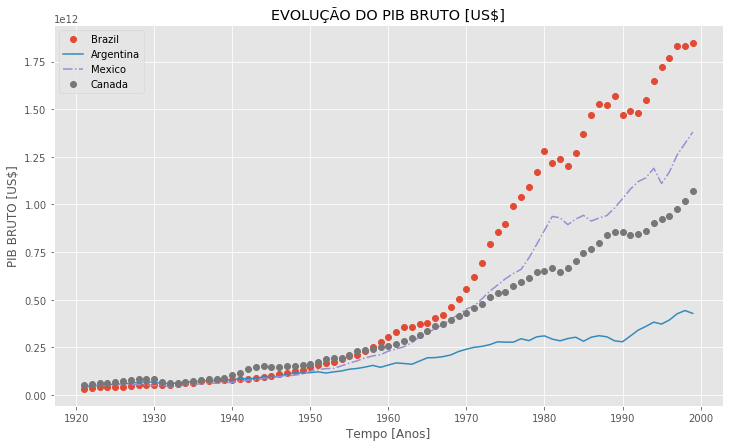

In [31]:
# Selecionando os países que almejo
pib_bruto_oea = pib_total.loc[
        (pib_total.country=="Argentina") |
        (pib_total.country=="Brazil") |
        (pib_total.country=="Canada") |
        (pib_total.country=="Mexico") |
        (pib_total.country=="Uruguay") |
        (pib_total.country=="Cuba") |
        (pib_total.country=="Honduras")
]

pib_oea = pib_bruto_oea.rename(columns = {'country':'Pais'})
pib_bruto = pib_oea.set_index("Pais").transpose().iloc[:220, :]

# Tirando os anos que não têm dados
pib_bruto_nan = pib_bruto.dropna()

plt.figure(figsize=(12,7))
plt.plot(pib_bruto_nan.loc[(pib_bruto_nan.index > 1920) & (pib_bruto_nan.index < 2000), "Brazil"], 'o', label="Brazil")
plt.plot(pib_bruto_nan.loc[(pib_bruto_nan.index > 1920) & (pib_bruto_nan.index < 2000), "Argentina"],'-', label="Argentina")
plt.plot(pib_bruto_nan.loc[(pib_bruto_nan.index > 1920) & (pib_bruto_nan.index < 2000), "Mexico"],'-.', label="Mexico")
plt.plot(pib_bruto_nan.loc[(pib_bruto_nan.index > 1920) & (pib_bruto_nan.index < 2000), "Canada"],'o', label="Canada")
plt.title("EVOLUÇÃO DO PIB BRUTO [US$]")
plt.xlabel("Tempo [Anos]")
plt.ylabel("PIB BRUTO [US$]")
plt.legend()

Com esta série temporal, nota-se um ponto muito relevante: A partir de 1950, os países começam a ter elevação do PIB, sendo que em 1960 o aumento se torna maior ainda para cada ano, tendo o coeficiente angular aumentado, o que aponta e deixa uma possível demonstração de que de fato a entrada na OEA auxiliou no crescimento do PIB, já que foi na época de impacto das políticas que o crescimentou começou a se tornar mais relevante.

Ademais, um ponto importante de se considerar é que o Canadá adentrou somente em 1990, apesar de também apresentar um crescimento desde 1950 também. Isso deixa a questão: foi a OEA que influenciou nos outros países ou outra questão global?

#### PAÍSES NÃO PERTENCENTES

O Brasil está inserido no gráfico apenas para se ter como comparação, porém o intuito é ver se os países fora da OEA, com um perfil parecido com o do Brasil, México, Canadá, também apresentaram crescimento semelhante ou não, visando saber se foi influência da OEA ou do âmbito global.

Text(0.5, 1.0, 'Evolução do PIB (Fora da OEA)')

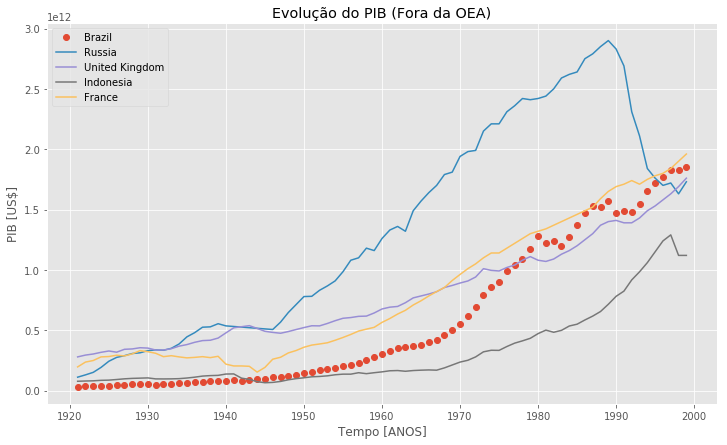

In [250]:
pib_bruto_fora = pib_total.loc[
        (pib_total.country=="Russia") |
        (pib_total.country=="United Kingdom") |
        (pib_total.country=="Indonesia") |
        (pib_total.country=="France") |
        (pib_total.country=="Brazil")
].set_index("country").transpose()

plt.figure(figsize=(12,7))
plt.plot(pib_bruto_fora.loc[(pib_bruto_fora.index > 1920) & (pib_bruto_fora.index < 2000), "Brazil"],'o', label="Brazil")
plt.plot(pib_bruto_fora.loc[(pib_bruto_fora.index > 1920) & (pib_bruto_fora.index < 2000), "Russia"], label="Russia")
plt.plot(pib_bruto_fora.loc[(pib_bruto_fora.index > 1920) & (pib_bruto_fora.index < 2000), "United Kingdom"], label="United Kingdom")
plt.plot(pib_bruto_fora.loc[(pib_bruto_fora.index > 1920) & (pib_bruto_fora.index < 2000), "Indonesia"], label="Indonesia")
plt.plot(pib_bruto_fora.loc[(pib_bruto_fora.index > 1920) & (pib_bruto_fora.index < 2000), "France"], label="France")
plt.legend()
plt.ylabel("PIB [US$]")
plt.xlabel("Tempo [ANOS]")
plt.title("Evolução do PIB (Fora da OEA)")

Com esse gráfico, nota-se que todos os países também apresentaram um crescimento mais elevado a partir de 1950, o que aponta para uma possível influência global no quesito do PIB, sem deixar provas suficientes de que foi a OEA que realmente elevou o PIB dos países pertencentes. 

## **ÍNDICE DE GINI**

Primeiramente, será feita a análise do Índice de Gini, que mede o nível de desigualdade dos países. Quanto maior o índice, mais desigual é aquele país, naquele determinado ano. A análise irá consistir em ver se os países que entraram à OEA apresentaram uma redução na desigualdade, para ver se de fato esse objetivo da OEA está sendo cumprido. A hipótese é de que não tenha redução significativa, mas tenha um aumento, tendo em vista a aplicação de políticas neoliberais.


In [41]:
# Identificando quais são os países que pertencem à OEA e que serão utilizados
gini_paises_da_oea = gini.loc[
    (gini.country=="Argentina") |
    (gini.country=="Brazil") |
    (gini.country=="Canada") |
    (gini.country=="Cuba") |
    (gini.country=="Honduras") |
    (gini.country=="Mexico") |
    (gini.country=="Chile")
]

# Mudando o "country" para "País" e deixando o índice como o nome do país
gini_new = gini_paises_da_oea.rename(columns = {'country':'Pais'})
gini_oea = gini_new.set_index("Pais")

# Foi colocado 220 para delitimar o período, tendo em vista que na tabela já possui previsões
gini_oea.iloc[:,120:220]

,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,48.6,48.3,48.1,47.8,47.5,47.2,47.0,46.6,46.3,46.1,...,43.0,42.3,41.8,41.6,41.6,41.8,42.1,42.3,42.4,42.4
Brazil,39.4,40.3,41.2,42.1,42.9,43.7,44.3,44.8,45.3,45.6,...,53.3,53.1,52.6,52.2,51.9,51.6,51.4,51.3,51.3,51.3
Canada,41.2,41.3,41.4,41.6,41.8,42.1,42.5,43.0,43.3,43.3,...,33.7,33.8,33.3,32.8,32.2,31.7,31.1,31.1,31.1,31.1
Chile,61.3,61.8,62.3,62.7,63.1,63.3,63.4,63.3,63.1,62.8,...,48.2,47.9,47.6,47.5,47.5,47.5,47.6,47.7,47.7,47.7
Cuba,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,43.3,43.4,43.4,43.4,43.4,43.4,43.4,43.4,43.4,43.4
Honduras,61.7,61.8,61.9,62.0,62.2,62.3,62.4,62.5,62.6,62.7,...,54.4,53.9,53.7,53.0,51.7,50.5,50.0,50.0,50.1,50.1
Mexico,47.9,48.1,48.2,48.4,48.5,48.7,48.8,48.9,48.9,49.0,...,46.8,46.8,46.9,46.9,46.8,46.5,46.3,46.0,45.9,45.9


Agora que possuímos dados de gini dos países, podemos separar um período de tempo para analisar seus dados. Como a OEA foi criada em 1948, é interessante ressaltar um período considerável antes e depois da data, que foi 1948.

***É importante salientar também que, quanto maior o índice de gini, maior é o nível de desigualdade daquele país.***

In [42]:
# Abaixo, demonstra-se a tabela nos anos selecionados
gini_oea.iloc[:, 120:181]

,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,...,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,48.6,48.3,48.1,47.8,47.5,47.2,47.0,46.6,46.3,46.1,...,35.6,35.3,35.2,35.5,36.1,36.9,37.9,38.8,39.7,40.4
Brazil,39.4,40.3,41.2,42.1,42.9,43.7,44.3,44.8,45.3,45.6,...,49.8,50.5,51.3,52.2,53.0,53.8,54.6,55.5,56.3,57.1
Canada,41.2,41.3,41.4,41.6,41.8,42.1,42.5,43.0,43.3,43.3,...,35.2,35.1,34.7,34.3,33.7,33.4,33.1,33.0,32.6,32.6
Chile,61.3,61.8,62.3,62.7,63.1,63.3,63.4,63.3,63.1,62.8,...,50.1,50.2,51.0,51.7,52.5,53.2,54.0,54.7,55.3,55.8
Cuba,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,39.0,39.1,39.2,39.3,39.4,39.5,39.6,39.7,39.9,40.0
Honduras,61.7,61.8,61.9,62.0,62.2,62.3,62.4,62.5,62.6,62.7,...,67.1,66.8,66.4,66.0,65.5,65.1,64.7,64.2,63.8,63.4
Mexico,47.9,48.1,48.2,48.4,48.5,48.7,48.8,48.9,48.9,49.0,...,49.9,49.6,49.2,48.7,48.3,47.9,47.4,47.2,47.1,47.2


Como há muitos dados para se vizualizar, fica interessante separar alguns países para se ter uma vizualização melhor e mais focada, para se ter uma ideia do geral.

O Canadá, por exemplo, só adentrou à OEA em 1990, sendo insustentável para ser considerado na análise o período demonstrado acima, sendo portanto passível de comparação nos anos posteriores.

O Brasil, no entanto, pertence à organização desde seu início, assim como a Argentina, México e o Uruguai.

Por conta disso, é interessante comparar tais países, já que não possuem uma disparidade tão grande de perfil econômico. O Brasil têm maior PIB, no entanto não se distancia do perfil dos outros países, que também são economias emergentes.

Abaixo, observamos os dados dos quatro países, de 1920 a 1980.

In [43]:
transp_gini = gini_oea.iloc[:,120:220].loc[["Brazil", "Argentina", "Chile", "Mexico", "Canada"]].transpose()
transp_gini

Pais,Brazil,Argentina,Chile,Mexico,Canada
1920,39.4,48.6,61.3,47.9,41.2
1921,40.3,48.3,61.8,48.1,41.3
1922,41.2,48.1,62.3,48.2,41.4
1923,42.1,47.8,62.7,48.4,41.6
1924,42.9,47.5,63.1,48.5,41.8
1925,43.7,47.2,63.3,48.7,42.1
1926,44.3,47.0,63.4,48.8,42.5
1927,44.8,46.6,63.3,48.9,43.0
1928,45.3,46.3,63.1,48.9,43.3
1929,45.6,46.1,62.8,49.0,43.3


Para se ter uma melhor vizualização, é relevante colocar em um gráfico de dispersão, para vizualizar o crescimento ou o decrescimento do Índice de Gini.

***Importante lembrar que o ano de criação da OEA foi 1948***

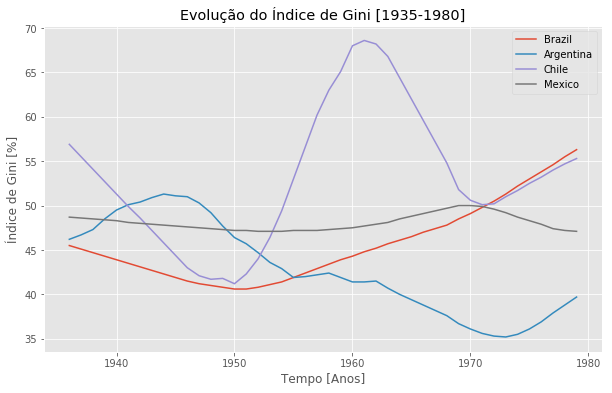

In [50]:
plt.figure(figsize=(10,6))
# Plotando o gráfico da evolução do Índice de Gini no decorrer dos anos
plt.plot(transp_gini.loc[(transp_gini.index > 1935) & (transp_gini.index < 1980), "Brazil"], label="Brazil")
plt.plot(transp_gini.loc[(transp_gini.index > 1935) & (transp_gini.index < 1980), "Argentina"], label="Argentina")
plt.plot(transp_gini.loc[(transp_gini.index > 1935) & (transp_gini.index < 1980), "Chile"], label="Chile")
plt.plot(transp_gini.loc[(transp_gini.index > 1935) & (transp_gini.index < 1980), "Mexico"], label="Mexico")
plt.title("Evolução do Índice de Gini [1935-1980]")
plt.xlabel("Tempo [Anos]")
plt.ylabel("Índice de Gini [%]")
plt.legend()
plt.grid(True)
plt.show()

Para o Canadá, país que só entrou na OEA em 1990, em comparação aos outros 3 países que já estavam dentro da OEA - entre 1950 e 2019-, tem-se:

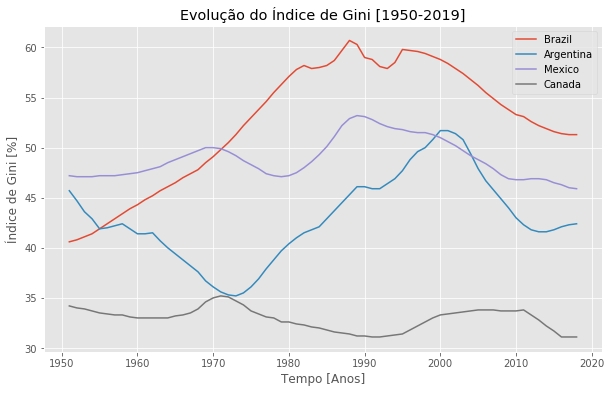

In [51]:
plt.figure(figsize=(10,6))
plt.plot(transp_gini.loc[(transp_gini.index > 1950) & (transp_gini.index < 2019), "Brazil"], label="Brazil")
plt.plot(transp_gini.loc[(transp_gini.index > 1950) & (transp_gini.index < 2019), "Argentina"], label="Argentina")
plt.plot(transp_gini.loc[(transp_gini.index > 1950) & (transp_gini.index < 2019), "Mexico"], label="Mexico")
plt.plot(transp_gini.loc[(transp_gini.index > 1950) & (transp_gini.index < 2019), "Canada"], label="Canada")
plt.title("Evolução do Índice de Gini [1950-2019]")
plt.xlabel("Tempo [Anos]")
plt.ylabel("Índice de Gini [%]")
plt.legend()
plt.grid(True)
plt.show()

### PAÍSES DE FORA

Análise dos mesmos países vistos no PIB, vistos agora no gini

Text(0.5, 1.0, 'Evolução do Gini (Fora da OEA)')

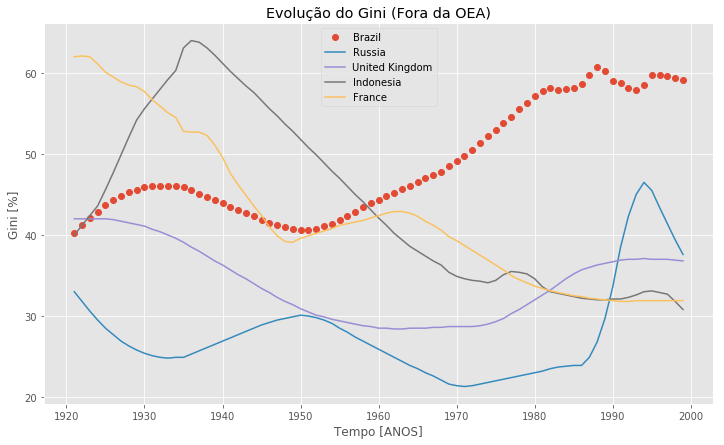

In [58]:
gini_fora = gini.loc[
        (gini.country=="Russia") |
        (gini.country=="United Kingdom") |
        (gini.country=="Indonesia") |
        (gini.country=="France") |
        (gini.country=="Brazil")
].set_index("country").transpose()


plt.figure(figsize=(12,7))
plt.plot(gini_fora.loc[(gini_fora.index > 1920) & (gini_fora.index < 2000), "Brazil"],'o', label="Brazil")
plt.plot(gini_fora.loc[(gini_fora.index > 1920) & (gini_fora.index < 2000), "Russia"], label="Russia")
plt.plot(gini_fora.loc[(gini_fora.index > 1920) & (gini_fora.index < 2000), "United Kingdom"], label="United Kingdom")
plt.plot(gini_fora.loc[(gini_fora.index > 1920) & (gini_fora.index < 2000), "Indonesia"], label="Indonesia")
plt.plot(gini_fora.loc[(gini_fora.index > 1920) & (gini_fora.index < 2000), "France"], label="France")
plt.legend()
plt.ylabel("Gini [%]")
plt.xlabel("Tempo [ANOS]")
plt.title("Evolução do Gini (Fora da OEA)")

A partir desse gráfico, confessa-se que houve quebra de expectativas! O gráfico acima mostra que os países do mundo, de fora da OEA, em contrapartida a estes, demonstraram redução do Gini (lembrando que houve elevação do PIB no mesmo período).

## **RELAÇÃO PIB E ÍNDICE DE GINI**

- países de fora comparação 
- junção pibxgini
- pib bruto   
- pensar em perguntas que refutam o que falei - comparar com o Mundo(?)

## **Acontecimentos na OEA**
1. O caso de Cuba
2. O caso de Honduras

## CONCLUSÃO

A pergunta original é:
     - Considerando que alguns dos objetivos da OEA é promover o desenvolvimento econômico e reduzir as desigualdades, um país que adentrou à organização aumentou seu PIB e reduziu as desigualdades?
     
A partir dos comentários feitos, nota-se que, de fato, um país que adentrou à OEA aumentou seu PIB, já que é demonstrado pelos gráficos. No entanto, 

- Lembrar de refutar a pergunta e respondê-la com base na análise dos dados vistos

### REFERÊNCIAS

[1]. KIITHI, Mauro. A organização dos Estados Americanos e o Sistema Interamericano de Direitos Humanos: complementaridade funcional ou contradição congênita?. Revista Jus Navigandi, ISSN 1518-4862, Teresina, ano 21, n. 4574, 9 jan. 2016. Disponível em: https://jus.com.br/artigos/34169. Acesso em: 27 ago. 2019.

[2]. Site da OEA (Organização dos Estados Americanos). Disponível em: https://www.oas.org/pt/topicos/comercio.asp. Acesso em: 18 ago. 2019.

[3]. CARNEIRO, André P; ROSADO GAMBI, Thiago F. Neoliberalismo, Desigualdade e Democracia:
Discussão Fundamentada nos Conselhos Econômicos e Sociais. 2018. Disponível em: http://bibliotecadigital.fgv.br/ojs/index.php/cgpc/article/download/68697/71541. Acesso em: 18 ago. 2019.

[4]. Dados disponíveis em https://pt.countryeconomy.com/paises/grupos/fmi. Acesso em 27 ago. 2019


[5]. Dados disponíveis em https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html. Acesso em 28 ago. 2019


[6]. PENA, Rodolfo F. Alves.	"O Poder dos Estados Unidos"; Brasil Escola. Disponível em: https://brasilescola.uol.com.br/geografia/o-poder-dos-estados-unidos.htm. Acesso em 20 de agosto de 2019.


[7]. Forças econômicas impulsionam as variações da balança comercial. VALOR, 2019. Disponível em: https://www.valor.com.br/blogfmi/6198051/forcas-economicas-impulsionam-variacoes-da-balanca-comercial. Acesso em 28 ago. 2019.

[8]. Impactos da Crise do Petróleo na Economia Brasileira. Disponível em: https://multivix.edu.br/wp-content/uploads/2018/08/impactos-da-crise-do-petroleo-na-economia-brasileira.pdf. Acesso em 28. ago. 2019.

[9]. A Argentina e a crise no Chile. Disponível em https://economia.estadao.com.br/noticias/geral,a-argentina-e-a-crise-chilena-de-82,20020226p25335. Acesso em 28. ago. 2019.
